In [50]:
import pandas as pd

In [51]:
data = pd.read_excel('data/champagne_new.xlsx', index_col=0)
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [52]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [54]:
data.columns = ['Sales_of_champagne']
data.head()

,Sales_of_champagne
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [55]:
data.tail()

,Sales_of_champagne
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sales_of_champagne  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [57]:
from datetime import datetime
import matplotlib.pyplot as plt

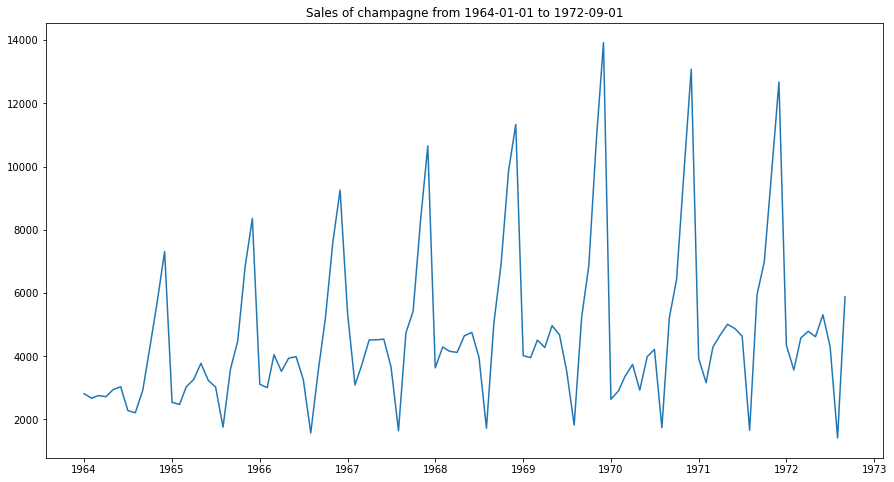

In [58]:
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title("Sales of champagne from 1964-01-01 to 1972-09-01")
plt.show()

In [59]:
type(data)

pandas.core.frame.DataFrame

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x = data, model='multiplicative')
result

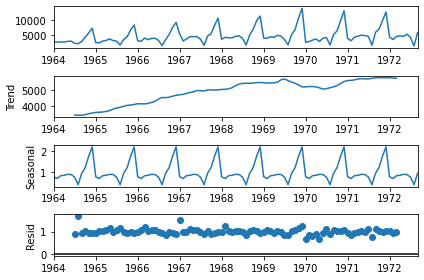

In [61]:
result.plot()
plt.show()

In [62]:
from pmdarima.arima import auto_arima

In [63]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                 max_p=3, max_q=3, m=12,
                 start_P=0, seasonal=True,
                 d=1, D=1, trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1486.124, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1486.804, Time=0.61 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1486.780, Time=1.59 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.51 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=1.49 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.26 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1487.125, Time=0.66 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1487.101, Time=0.80 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.07 sec
 ARIMA(0,1,2)(1,1,0)[12]

In [64]:
print(stepwise_model.aic())

1485.1904965873582


In [65]:
train = data.loc['1964-01-01':'1971-01-01']
test = data.loc['1971-01-01':]

In [66]:
test

,Sales_of_champagne
Month,
1971-01-01,3934
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874
1971-07-01,4633
1971-08-01,1659
1971-09-01,5951


In [67]:
len(test)

21

In [68]:
len(train)

85

In [69]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [70]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [71]:
future_forecast

array([ 3359.71557778,  3658.39262126,  3865.36758239,  3333.10924456,
        4127.53057384,  4089.22321606,  1760.77340424,  5227.82873432,
        6517.52214093, 10035.02459982, 13245.55408634,  3689.43553102,
        3276.97428039,  3609.07619143,  3847.67254207,  3260.95973419,
        4106.70045449,  4120.62969458,  1762.97819399,  5233.12625543,
        6506.00404787])

In [72]:
future_forecast = pd.DataFrame(future_forecast,
                               index = test.index,
                               columns=['Prediction'])

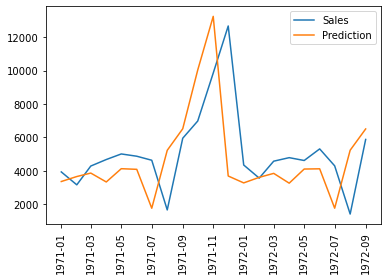

In [73]:
plt.plot(test, label='Sales')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

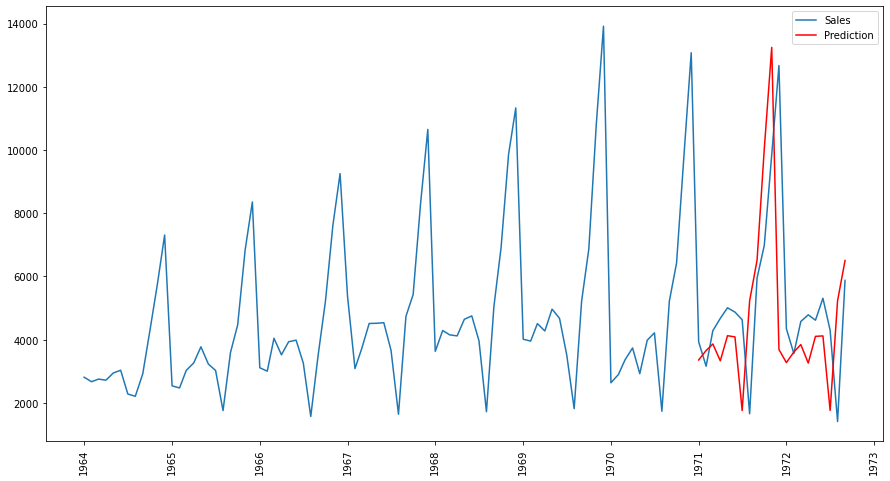

In [74]:
plt.figure(figsize=(15,8))
plt.plot(data, label='Sales')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [75]:
# 9 months predicion
future_forecast = stepwise_model.predict(n_periods=len(test)+9)
future_forecast

array([ 3359.71557778,  3658.39262126,  3865.36758239,  3333.10924456,
        4127.53057384,  4089.22321606,  1760.77340424,  5227.82873432,
        6517.52214093, 10035.02459982, 13245.55408634,  3689.43553102,
        3276.97428039,  3609.07619143,  3847.67254207,  3260.95973419,
        4106.70045449,  4120.62969458,  1762.97819399,  5233.12625543,
        6506.00404787, 10004.20636593, 13219.28834512,  3743.49490469,
        3299.64538449,  3625.26399191,  3857.72685321,  3281.57638673,
        4117.36286585,  4121.15995737])

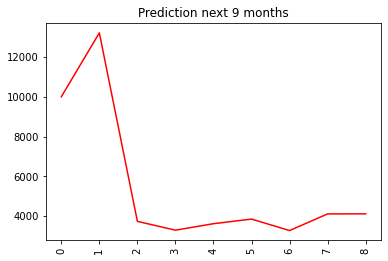

In [76]:
plt.plot(future_forecast[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months")
plt.show()